In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pickle
import sklearn.ensemble
import sklearn.neural_network

import utils

In [2]:
high_management = [86, 7, 27, 36, 69, 70, 85, 104, 121, 148, 156, 163]
middle_management = [76, 90, 136, 137, 143, 152, 47, 162]

In [3]:
with open("G_communication.pkl", "rb") as f:
    G_communication = pickle.load(f)
    
with open("G_reportsto.pkl", "rb") as f:
    G_reportsto = pickle.load(f)
    
with open("G_both.pkl", "rb") as f:
    G_both = pickle.load(f)

# Nodes Ranking

In [4]:
G = G_communication

In [5]:
num_nodes = G.number_of_nodes()
num_nodes

167

In [6]:
pct_uncover = 0.1
num_nodes_to_uncover = int(num_nodes * pct_uncover)
num_nodes_to_uncover

16

### Utility Score

In [7]:
centrality = nx.betweenness_centrality(G)  # , weight='num_mails'

In [8]:
max([(value, key) for key, value in centrality.items()])

(0.08242003796017484, 130)

In [9]:
nodes_betweeness = [(k, v) for k, v in sorted(centrality.items(), key=lambda item: item[1], reverse=True)]
nodes_betweeness[:num_nodes_to_uncover]

[(130, 0.08242003796017484),
 (89, 0.06496273893787789),
 (45, 0.06469467860408139),
 (132, 0.052366656658001616),
 (17, 0.040290342374838486),
 (36, 0.03869156858121181),
 (73, 0.036428792647848415),
 (164, 0.036428792647848415),
 (8, 0.03361635159102188),
 (121, 0.026423038140718228),
 (118, 0.026209994821318656),
 (94, 0.021278313998907894),
 (95, 0.02069227892794182),
 (33, 0.02042537850119877),
 (39, 0.019949765751694996),
 (103, 0.016423421964696608)]

In [10]:
idxs = [k[0] for k in nodes_betweeness[:num_nodes_to_uncover]]
idxs

[130, 89, 45, 132, 17, 36, 73, 164, 8, 121, 118, 94, 95, 33, 39, 103]

In [11]:
attrs = {}
for idx in idxs:
    if idx in high_management:
        attrs[idx] = {'class': 2}
        print("high")
    elif idx in middle_management:
        attrs[idx] = {'class': 1}
        print("middle")
    else:
        attrs[idx] = {'class': 0}
        print("no")
        
nx.set_node_attributes(G, attrs)

no
no
no
no
no
high
no
no
no
high
no
no
no
no
no
no


In [12]:
G.nodes[69], G.nodes[89]

({'true_class': 2,
  'node': 69,
  'sender': 1188,
  'recipient': 1683,
  'reporters': 8,
  'betweenness': 0.0024560411363757635,
  'degree': 0.3433734939759036,
  'eigenvector': 0.09574276430903757,
  'closeness': 0.5865724381625441,
  'load': 0.0024620873002904396,
  'harmonic': 110.16666666666663,
  'subgraph': 1.9850190425093486e+24},
 {'true_class': 0,
  'node': 89,
  'sender': 355,
  'recipient': 402,
  'reporters': 0,
  'betweenness': 0.06496273893787789,
  'degree': 0.819277108433735,
  'eigenvector': 0.1698524085106054,
  'closeness': 0.8426395939086294,
  'load': 0.06488353852866426,
  'harmonic': 150.83333333333334,
  'subgraph': 6.247270129996817e+24,
  'class': 0})

## Node attributes

In [13]:
def set_class_node_attribute(G, node, neighbour, class_name):
     if class_name in G.nodes[neighbour]:
        true_class = G.nodes[neighbour][class_name]
        if f'num_{true_class}' in G.nodes[node]:
            new_value = G.nodes[node][f'num_{true_class}'] + 1
        else:
            new_value = 1
        nx.set_node_attributes(G, {node: {f'num_{true_class}': new_value}})

def set_node_attribute(G, node, neighbour):
    set_class_node_attribute(G, node, neighbour, 'class')
    set_class_node_attribute(G, node, neighbour, 'pred_class')

In [14]:
def set_all_class_node_attrs(G):
    for node in G.nodes:
        nx.set_node_attributes(G, {node: {'num_0': 0, 'num_1': 0, 'num_2': 0}})

    for node in G.nodes:
        for source, dest in G.edges(node):
            if source == node:
                set_node_attribute(G, node, dest)
#             elif dest == node:
#                 set_node_attribute(G, node, source)

set_all_class_node_attrs(G)

In [15]:
G.nodes[69], G.nodes[89]

({'true_class': 2,
  'node': 69,
  'sender': 1188,
  'recipient': 1683,
  'reporters': 8,
  'betweenness': 0.0024560411363757635,
  'degree': 0.3433734939759036,
  'eigenvector': 0.09574276430903757,
  'closeness': 0.5865724381625441,
  'load': 0.0024620873002904396,
  'harmonic': 110.16666666666663,
  'subgraph': 1.9850190425093486e+24,
  'num_0': 12,
  'num_1': 0,
  'num_2': 2},
 {'true_class': 0,
  'node': 89,
  'sender': 355,
  'recipient': 402,
  'reporters': 0,
  'betweenness': 0.06496273893787789,
  'degree': 0.819277108433735,
  'eigenvector': 0.1698524085106054,
  'closeness': 0.8426395939086294,
  'load': 0.06488353852866426,
  'harmonic': 150.83333333333334,
  'subgraph': 6.247270129996817e+24,
  'class': 0,
  'num_0': 13,
  'num_1': 0,
  'num_2': 2})

In [16]:
for node in G.nodes:
    print(node, G.nodes[node])

17 {'true_class': 0, 'node': 17, 'sender': 2086, 'recipient': 1290, 'reporters': 0, 'betweenness': 0.040290342374838486, 'degree': 0.783132530120482, 'eigenvector': 0.16952752095325632, 'closeness': 0.8137254901960784, 'load': 0.040220320698813844, 'harmonic': 147.66666666666669, 'subgraph': 6.223397281803857e+24, 'class': 0, 'num_0': 13, 'num_1': 0, 'num_2': 2}
39 {'true_class': 0, 'node': 39, 'sender': 1077, 'recipient': 1157, 'reporters': 8, 'betweenness': 0.019949765751694996, 'degree': 0.5, 'eigenvector': 0.12652600542898718, 'closeness': 0.6484375, 'load': 0.019953534175401744, 'harmonic': 123.41666666666664, 'subgraph': 3.466650784507853e+24, 'class': 0, 'num_0': 12, 'num_1': 0, 'num_2': 2}
112 {'true_class': 0, 'node': 112, 'sender': 545, 'recipient': 542, 'reporters': 0, 'betweenness': 0.0025404328236247656, 'degree': 0.30120481927710846, 'eigenvector': 0.08140936466198904, 'closeness': 0.5533333333333333, 'load': 0.002534249637327574, 'harmonic': 105.08333333333326, 'subgraph

In [17]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for node in G.nodes:
    if node in idxs:
        df_train = df_train.append(G.nodes[node], ignore_index=True)
    else:
        df_test = df_test.append(G.nodes[node], ignore_index=True)

df_train.set_index('node', drop=True, inplace=True)
df_test.set_index('node', drop=True, inplace=True)
df_train

,betweenness,class,closeness,degree,eigenvector,harmonic,load,num_0,num_1,num_2,recipient,reporters,sender,subgraph,true_class
node,,,,,,,,,,,,,,,
17.0,0.040290,0.0,0.813725,0.783133,0.169528,147.666667,0.040220,13.0,0.0,2.0,1290.0,0.0,2086.0,6.223397e+24,0.0
39.0,0.019950,0.0,0.648438,0.500000,0.126526,123.416667,0.019954,12.0,0.0,2.0,1157.0,8.0,1077.0,3.466651e+24,0.0
33.0,0.020425,0.0,0.578397,0.325301,0.086485,108.500000,0.020447,12.0,0.0,1.0,536.0,2.0,694.0,1.619716e+24,0.0
73.0,0.036429,0.0,0.805825,0.771084,0.168768,146.666667,0.036360,13.0,0.0,2.0,688.0,0.0,647.0,6.167792e+24,0.0
94.0,0.021278,0.0,0.633588,0.481928,0.115933,121.416667,0.021276,11.0,0.0,2.0,400.0,0.0,372.0,2.910484e+24,0.0
132.0,0.052367,0.0,0.813725,0.783133,0.168962,147.666667,0.052294,13.0,0.0,2.0,1071.0,1.0,1062.0,6.181924e+24,0.0
118.0,0.026210,0.0,0.590747,0.349398,0.098172,110.833333,0.026220,10.0,0.0,2.0,612.0,2.0,2884.0,2.087046e+24,0.0
36.0,0.038692,2.0,0.603636,0.397590,0.107510,114.500000,0.038697,12.0,0.0,1.0,1261.0,9.0,1627.0,2.502955e+24,2.0
121.0,0.026423,2.0,0.594982,0.361446,0.098849,111.833333,0.026426,13.0,0.0,1.0,778.0,3.0,570.0,2.115905e+24,2.0


In [18]:
df_test.head(10)

,betweenness,closeness,degree,eigenvector,harmonic,load,num_0,num_1,num_2,recipient,reporters,sender,subgraph,true_class
node,,,,,,,,,,,,,,
112.0,0.002540,0.553333,0.301205,0.081409,105.083333,0.002534,10.0,0.0,0.0,542.0,0.0,545.0,1.435163e+24,0.0
77.0,0.000819,0.538961,0.253012,0.073039,101.083333,0.000829,10.0,0.0,1.0,584.0,2.0,494.0,1.155224e+24,0.0
142.0,0.000103,0.491124,0.114458,0.037410,88.416667,0.000105,8.0,0.0,0.0,89.0,0.0,82.0,3.030688e+23,0.0
117.0,0.006181,0.603636,0.415663,0.107141,115.500000,0.006192,11.0,0.0,1.0,712.0,0.0,766.0,2.485755e+24,0.0
158.0,0.000168,0.500000,0.150602,0.044807,91.416667,0.000169,7.0,0.0,0.0,346.0,0.0,289.0,4.347535e+23,0.0
150.0,0.002373,0.564626,0.319277,0.087581,107.083333,0.002370,11.0,0.0,1.0,242.0,0.0,313.0,1.660993e+24,0.0
65.0,0.002065,0.546053,0.301205,0.080739,104.416667,0.002067,8.0,0.0,0.0,521.0,0.0,636.0,1.411621e+24,0.0
91.0,0.000589,0.520376,0.198795,0.060216,96.250000,0.000588,9.0,0.0,1.0,135.0,0.0,124.0,7.851951e+23,0.0
66.0,0.013125,0.546053,0.246988,0.071583,101.333333,0.013125,13.0,0.0,1.0,376.0,0.0,124.0,1.109605e+24,0.0


In [19]:
labels_train = df_train['class']
df_train = df_train.drop(columns=['class', 'true_class'])

labels_test = df_test['true_class']
df_test = df_test.drop(columns=['true_class'])

# Classification

In [20]:
# clf = sklearn.ensemble.RandomForestClassifier()
clf = sklearn.ensemble.AdaBoostClassifier()
# clf = sklearn.neural_network.MLPClassifier()

In [21]:
clf = clf.fit(df_train, labels_train)

In [22]:
y_predicted = clf.predict(df_test)

In [23]:
print(y_predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 0. 2. 0. 0. 0. 0.]


In [24]:
utils.count_classification_metrics(labels_test, y_predicted)

/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'test_accuracy': 0.8741721854304636,
 'test_f1_micro': 0.8741721854304636,
 'test_recall_micro': 0.8741721854304636,
 'test_precision_micro': 0.8741721854304636,
 'test_f1_macro': 0.39130742549727465,
 'test_recall_macro': 0.3924812030075188,
 'test_precision_macro': 0.39616402116402116,
 'test_f1_weighted': 0.8423211013432077,
 'test_recall_weighted': 0.8741721854304636,
 'test_precision_weighted': 0.8140833596131609}

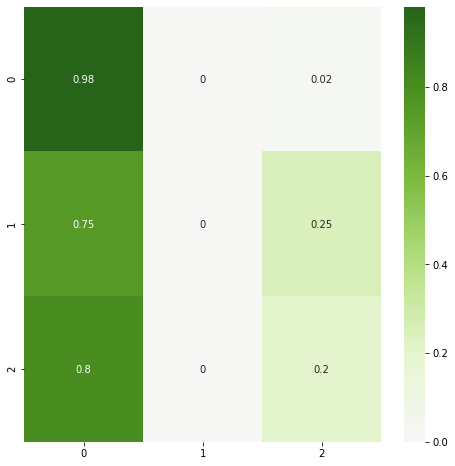

In [25]:
utils.plot_confusion_matrix(labels_test, y_predicted)

In [26]:
df_test.head()

,betweenness,closeness,degree,eigenvector,harmonic,load,num_0,num_1,num_2,recipient,reporters,sender,subgraph
node,,,,,,,,,,,,,
112.0,0.002540,0.553333,0.301205,0.081409,105.083333,0.002534,10.0,0.0,0.0,542.0,0.0,545.0,1.435163e+24
77.0,0.000819,0.538961,0.253012,0.073039,101.083333,0.000829,10.0,0.0,1.0,584.0,2.0,494.0,1.155224e+24
142.0,0.000103,0.491124,0.114458,0.037410,88.416667,0.000105,8.0,0.0,0.0,89.0,0.0,82.0,3.030688e+23
117.0,0.006181,0.603636,0.415663,0.107141,115.500000,0.006192,11.0,0.0,1.0,712.0,0.0,766.0,2.485755e+24
158.0,0.000168,0.500000,0.150602,0.044807,91.416667,0.000169,7.0,0.0,0.0,346.0,0.0,289.0,4.347535e+23


In [34]:
df_test.shape, df_train.shape

((151, 13), (16, 13))

In [27]:
for node, y in zip(df_test.index, y_predicted):
    nx.set_node_attributes(G, {node: {'pred_class': y}})

In [28]:
num_iterations = 10

for i in range(num_iterations):
    set_all_class_node_attrs(G)
    for node in df_test.index:
        for i in range(3):
            df_test.loc[node, f'num_{i}'] = G.nodes[node][f'num_{i}']
#                 df_test[f'num_{i}'][node] = G.nodes[node][f'num_{i}']
        y = int(clf.predict([df_test.loc[node]])[0])
        nx.set_node_attributes(G, {node: {'pred_class': y}})
#             print(y)
        

In [29]:
df_test.head()

,betweenness,closeness,degree,eigenvector,harmonic,load,num_0,num_1,num_2,recipient,reporters,sender,subgraph
node,,,,,,,,,,,,,
112.0,0.002540,0.553333,0.301205,0.081409,105.083333,0.002534,49.0,0.0,1.0,542.0,0.0,545.0,1.435163e+24
77.0,0.000819,0.538961,0.253012,0.073039,101.083333,0.000829,40.0,0.0,2.0,584.0,2.0,494.0,1.155224e+24
142.0,0.000103,0.491124,0.114458,0.037410,88.416667,0.000105,18.0,0.0,1.0,89.0,0.0,82.0,3.030688e+23
117.0,0.006181,0.603636,0.415663,0.107141,115.500000,0.006192,67.0,0.0,2.0,712.0,0.0,766.0,2.485755e+24
158.0,0.000168,0.500000,0.150602,0.044807,91.416667,0.000169,25.0,0.0,0.0,346.0,0.0,289.0,4.347535e+23


In [30]:
y_true = []
y_pred = []
for node in G.nodes:
    if 'pred_class' in G.nodes[node]:
#         print(node, G.nodes[node]['true_class'], int(G.nodes[node]['pred_class'][0]))
        y_true.append(G.nodes[node]['true_class'])
        y_pred.append(int(G.nodes[node]['pred_class']))
        
# list(zip(y_true, y_pred))

In [31]:
utils.count_classification_metrics(y_true, y_pred)

/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'test_accuracy': 0.8741721854304636,
 'test_f1_micro': 0.8741721854304636,
 'test_recall_micro': 0.8741721854304636,
 'test_precision_micro': 0.8741721854304636,
 'test_f1_macro': 0.39130742549727465,
 'test_recall_macro': 0.3924812030075188,
 'test_precision_macro': 0.39616402116402116,
 'test_f1_weighted': 0.8423211013432077,
 'test_recall_weighted': 0.8741721854304636,
 'test_precision_weighted': 0.8140833596131609}

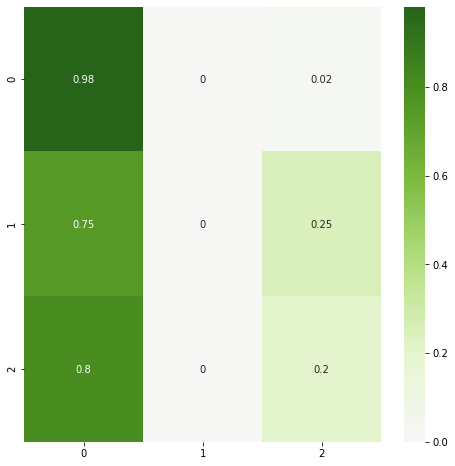

In [32]:
utils.plot_confusion_matrix(y_true, y_pred)